# Michael Litvin

<b>https://www.linkedin.com/in/litvin</b>

This notebook demonstrates the use of the requested method with comparison to an orthogonal projection of the CT volume in the axial/sagittal/coronal directions.
The X-ray projection can be run by using `proj_ct_to_xray` (demonstrated here) or `proj_ct_to_xray_from_folder` (demonstrated in `demo()` of `ct_projection.py`).

In [1]:
# Imports and general parameters
import ct_projection as ctp
import numpy as np
import matplotlib.pyplot as plt

ct_scan_folder = './Case2/'

In [2]:
# Load data
ct_img3d, voxel_spacing, ct_position, ct_orientation = ctp.load_dicom_ct_scan_from_folder(ct_scan_folder)
img_shape = ct_img3d.shape
print("Position: {}".format(ct_position))
print("Orientation: {}".format(ct_orientation))
print("Voxel spacing: {}".format(voxel_spacing))

Loading 225 files from ./Case2/
Done loading 225 files
skipped, no SliceLocation: 0
Shape: [512, 512, 225]
Position: [-206.800003, -212.0, -280.0]
Orientation: [1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
Voxel spacing: [0.828125, 0.828125, 1.25]


In [3]:
# Calculate bounding box
ct_matrix = ctp.orientation_to_affine_matrix(ct_position, ct_orientation, voxel_spacing)
start_point = np.matmul(ct_matrix, [0,0,0,1])
end_point = np.matmul(ct_matrix, [x-1 for x in img_shape] + [1])
print("start_point {}".format(start_point))
print("end_point   {}".format(end_point))
np.testing.assert_array_equal(start_point[:3], ct_position)

start_point [-206.800003 -212.       -280.          1.      ]
end_point   [216.371872 211.171875   0.         1.      ]


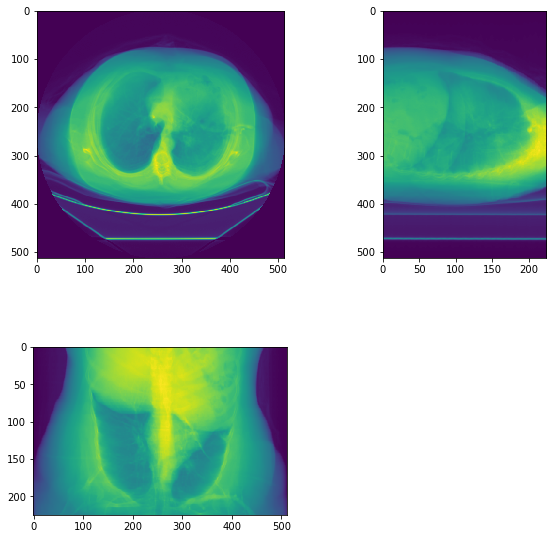

In [4]:
# Plot 3 orthogonal slices (adapted from https://github.com/pydicom/pydicom/blob/master/examples/image_processing/reslice.py)
plt.rcParams["figure.figsize"] = (10,10)
ps = voxel_spacing[:2]
ss = voxel_spacing[2]
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

a1 = plt.subplot(2, 2, 1)
plt.imshow(np.sum(ct_img3d, axis=2))
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(np.sum(ct_img3d, axis=1))
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(np.sum(ct_img3d, axis=0).T)
a3.set_aspect(cor_aspect)

plt.show()

100%|██████████| 117600/117600 [00:25<00:00, 4605.55it/s]


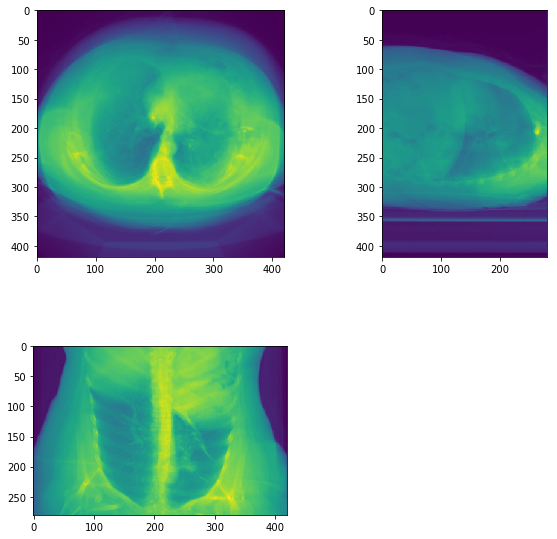

In [5]:
# Demonstrate our new CT to X-ray projection method
plt.rcParams["figure.figsize"] = (10,10)
ds = 1  # downsample to run faster

light_pos = [0, 0, -1000.]
board_transform = np.array([[ds, 0, 0, -210],
                            [0, 0, ds, -210],
                            [0, -ds, 0, 0],
                            [0, 0, 0, 1]])
board = ctp.SensorBoard(transform=board_transform,
                        resolution=(420 // ds, 420 // ds))
xray_ax = ctp.proj_ct_to_xray(light_pos, board, np.linalg.inv(ct_matrix), ct_img3d)
plt.subplot(2, 2, 1)
plt.imshow(xray_ax)

light_pos = [0, 1000, -140.]
board_transform = np.array([[ds, 0, 0, -210],
                            [0, ds, 0, 0],
                            [0, 0, ds, -280],
                            [0, 0, 0, 1]])
board = ctp.SensorBoard(transform=board_transform,
                        resolution=(420 // ds, 280 // ds))
xray_sag = ctp.proj_ct_to_xray(light_pos, board, np.linalg.inv(ct_matrix), ct_img3d)
plt.subplot(2, 2, 2)
plt.imshow(xray_sag)

light_pos = [1000, 0, -140.]
board_transform = np.array([[0, -ds, 0, 0],
                            [ds, 0, 0, -210],
                            [0, 0, ds, -280],
                            [0, 0, 0, 1]])
board = ctp.SensorBoard(transform=board_transform,
                        resolution=(420 // ds, 280 // ds))
xray_cor = ctp.proj_ct_to_xray(light_pos, board, np.linalg.inv(ct_matrix), ct_img3d)
plt.subplot(2, 2, 3)
plt.imshow(xray_cor.T)

plt.show()